In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pyalex
from pyalex import Authors, Concepts, Institutions, Works
import xarray as xr

from researcher_impact.utils import dict_to_dataarray

In [77]:
# The polite pool has much faster and more consistent response times. To get into the polite pool, you set your email:
pyalex.config.email = "ben@epochai.org"

In [2]:
ai_authors_df = pd.read_csv('data/experimental_ai_corpus/ai_authors.csv')

In [3]:
ai_authors_df.head()

,id,auth_id,auth_display_name,auth_orcid,affiliation_string,inst_id,year
0,https://openalex.org/W1479999262,https://openalex.org/A2144738937,Pharino Chum,NaN,The School of Electrical Electronics Engineeri...,https://openalex.org/I67900169,2012
1,https://openalex.org/W1479999262,https://openalex.org/A2113997021,Seung-Min Park,https://orcid.org/0000-0002-3307-9865,The School of Electrical Electronics Engineeri...,https://openalex.org/I67900169,2012
2,https://openalex.org/W1479999262,https://openalex.org/A2145172062,Kwang-Eun Ko,https://orcid.org/0000-0001-6225-8080,The School of Electrical Electronics Engineeri...,https://openalex.org/I67900169,2012
3,https://openalex.org/W1479999262,https://openalex.org/A2163332875,Kwee-Bo Sim,https://orcid.org/0000-0002-7100-1268,The School of Electrical Electronics Engineeri...,https://openalex.org/I67900169,2012
4,https://openalex.org/W1483393056,https://openalex.org/A2132847893,Rui-Jun Yan,https://orcid.org/0000-0001-6362-6340,"Department of Mechatronics Engineering, Hanyan...",https://openalex.org/I4575257,2012


In [4]:
ai_works_df = pd.read_csv('data/experimental_ai_corpus/ai_openalex_works.csv')

In [5]:
ai_works_df.head()

,work_id,doi,display_name,publication_year,publication_date,cited_by_count,is_retracted,venue_id,venue_display_name,venue_url,predicted_language,language_probability,has_abstract,arxiv_id,ambiguous
0,https://openalex.org/W1479999262,NaN,Optimal EEG feature extraction based on R-squa...,2012,2012-12-31,2,False,NaN,"international conference on control, automatio...",http://ieeexplore.ieee.org/xpls/abs_all.jsp?ar...,en,0.710485,True,NaN,False
1,https://openalex.org/W1483393056,NaN,Natural corners extraction algorithm in 2D unk...,2012,2012-12-31,6,False,NaN,"international conference on control, automatio...",https://scholarworks.bwise.kr/erica/handle/202...,en,0.810423,True,NaN,False
2,https://openalex.org/W1485658267,NaN,Adaptive synergy control for a dexterous artif...,2012,2012-12-31,3,False,NaN,"international conference on control, automatio...",http://ieeexplore.ieee.org/iel5/6375948/639302...,en,0.888194,True,NaN,False
3,https://openalex.org/W1485753303,NaN,Endoscopic vision based tracking of multiple s...,2012,2012-12-31,4,False,NaN,"international conference on control, automatio...",http://ieeexplore.ieee.org/iel5/6375948/639302...,en,0.916199,True,NaN,False
4,https://openalex.org/W1487477006,NaN,Departability motion for car-like robot based ...,2012,2012-12-31,0,False,NaN,"international conference on control, automatio...",http://ieeexplore.ieee.org/abstract/document/6...,en,0.961740,True,NaN,False


In [6]:
authors_per_year = {}
for i, row in ai_authors_df.iterrows():
    if row['year'] not in authors_per_year:
        authors_per_year[row['year']] = []
    authors_per_year[row['year']].append(row['auth_id'])
authors_per_year

{2012: ['https://openalex.org/A2144738937',
  'https://openalex.org/A2113997021',
  'https://openalex.org/A2145172062',
  'https://openalex.org/A2163332875',
  'https://openalex.org/A2132847893',
  'https://openalex.org/A2241393565',
  'https://openalex.org/A2713680215',
  'https://openalex.org/A2151479157',
  'https://openalex.org/A2139402480',
  'https://openalex.org/A2161838227',
  'https://openalex.org/A1593456018',
  'https://openalex.org/A1979981464',
  'https://openalex.org/A2004311611',
  'https://openalex.org/A2954019128',
  'https://openalex.org/A2579417532',
  'https://openalex.org/A3176981811',
  'https://openalex.org/A2288318162',
  'https://openalex.org/A2139402480',
  'https://openalex.org/A2161838227',
  'https://openalex.org/A2170708500',
  'https://openalex.org/A2150762632',
  'https://openalex.org/A2126942884',
  'https://openalex.org/A2132714476',
  'https://openalex.org/A2265410022',
  'https://openalex.org/A2682956202',
  'https://openalex.org/A2250646143',
  'htt

In [43]:
total_author_counts = dict_to_dataarray(authors_per_year, 'year', len)
total_author_counts

<xarray.DataArray (year: 10)>
array([190936., 198358., 202056., 217948., 232547., 253071., 321373.,
       405442., 465183., 564824.])
Coordinates:
  * year     (year) int64 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021

In [44]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=total_author_counts['year'],
        y=total_author_counts,
        mode='lines+markers',
    ),
)

## Plot layout
dates = np.arange(2010, 2022 + 1)
y_ticks = np.arange(0, 101, 10)
y_tick_text = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# set_default_fig_layout(fig, dates, dates, y_ticks, y_tick_text)

fig.update_yaxes(type="log")
fig.update_layout(
    title='Total number of unique authors on AI/ML publications',
    xaxis_title='Year',
    yaxis_title='Number of unique authors',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.5,
    margin=dict(l=100, r=30, t=80, b=80),
)

## Save plot
# fig.write_image(result_file_location + 'field_authors.png', scale=2)

## Show plot
fig.show()

In [66]:
works_by_year = {}
for i, row in ai_works_df.iterrows():
    if row['publication_year'] not in works_by_year:
        works_by_year[row['publication_year']] = []
    works_by_year[row['publication_year']].append(row['work_id'])

In [67]:
total_eac_work_counts = dict_to_dataarray(works_by_year, 'year', len)
total_eac_work_counts

<xarray.DataArray (year: 10)>
array([ 76687.,  78273.,  77675.,  78924.,  78452.,  83113., 101293.,
       124377., 139530., 170388.])
Coordinates:
  * year     (year) int64 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021

In [68]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=total_eac_work_counts['year'],
        y=total_eac_work_counts,
        mode='lines+markers',
    ),
)

## Plot layout
dates = np.arange(2010, 2022 + 1)
y_ticks = np.arange(0, 101, 10)
y_tick_text = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# set_default_fig_layout(fig, dates, dates, y_ticks, y_tick_text)

fig.update_yaxes(type="log")
fig.update_layout(
    title='Total number AI/ML works',
    xaxis_title='Year',
    yaxis_title='Number of works',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.5,
    margin=dict(l=100, r=30, t=80, b=80),
)

## Save plot
# fig.write_image(result_file_location + 'field_authors.png', scale=2)

## Show plot
fig.show()

In [76]:
Concepts()["https://openalex.org/C119857082"]["counts_by_year"]

[{'year': 2023, 'works_count': 97756, 'cited_by_count': 1711798},
 {'year': 2022, 'works_count': 283401, 'cited_by_count': 4348664},
 {'year': 2021, 'works_count': 283181, 'cited_by_count': 4452555},
 {'year': 2020, 'works_count': 234977, 'cited_by_count': 3749233},
 {'year': 2019, 'works_count': 199136, 'cited_by_count': 3008116},
 {'year': 2018, 'works_count': 169668, 'cited_by_count': 2411443},
 {'year': 2017, 'works_count': 144237, 'cited_by_count': 2013392},
 {'year': 2016, 'works_count': 134355, 'cited_by_count': 1896757},
 {'year': 2015, 'works_count': 131202, 'cited_by_count': 1836958},
 {'year': 2014, 'works_count': 131232, 'cited_by_count': 1725585},
 {'year': 2013, 'works_count': 127689, 'cited_by_count': 1557070},
 {'year': 2012, 'works_count': 122116, 'cited_by_count': 1371896}]

In [71]:
ml_concept = Concepts()["https://openalex.org/C119857082"]
total_oa_ml_work_counts = {}
for concept in [ml_concept]:
    for year_counts in concept['counts_by_year']:
        total_oa_ml_work_counts[year_counts['year']] = year_counts['works_count']
total_oa_ml_work_counts

{2023: 97756,
 2022: 283401,
 2021: 283181,
 2020: 234977,
 2019: 199136,
 2018: 169668,
 2017: 144237,
 2016: 134355,
 2015: 131202,
 2014: 131232,
 2013: 127689,
 2012: 122116}

In [72]:
total_oa_ml_work_counts = dict_to_dataarray(total_oa_ml_work_counts, 'year')
total_oa_ml_work_counts

<xarray.DataArray (year: 12)>
array([122116., 127689., 131232., 131202., 134355., 144237., 169668.,
       199136., 234977., 283181., 283401.,  97756.])
Coordinates:
  * year     (year) int64 2012 2013 2014 2015 2016 ... 2019 2020 2021 2022 2023

In [73]:
total_oa_ml_work_counts['year'].loc[:2022]

<xarray.DataArray 'year' (year: 11)>
array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
Coordinates:
  * year     (year) int64 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022

In [74]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=total_oa_ml_work_counts['year'].loc[:2022],
        y=total_oa_ml_work_counts.loc[:2022],
        mode='lines+markers',
        name='All "ML" works in OpenAlex',
    ),
)
fig.add_trace(
    go.Scatter(
        x=total_eac_work_counts['year'],
        y=total_eac_work_counts,
        mode='lines+markers',
        name='Works from experimental AI corpus',
    ),
)

## Plot layout
dates = np.arange(2010, 2022 + 1)
y_ticks = np.arange(0, 101, 10)
y_tick_text = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# set_default_fig_layout(fig, dates, dates, y_ticks, y_tick_text)

fig.update_yaxes(type="log")
fig.update_layout(
    title='Total number AI/ML works',
    xaxis_title='Year',
    yaxis_title='Number of works',
)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.5,
    margin=dict(l=100, r=30, t=80, b=80),
)

## Save plot
# fig.write_image(result_file_location + 'field_authors.png', scale=2)

## Show plot
fig.show()

In [75]:
# Measure correlation between the data sources
np.corrcoef(total_oa_ml_work_counts.loc[:2021], total_eac_work_counts.loc[:2021])

array([[1.        , 0.99704027],
       [0.99704027, 1.        ]])

In [69]:
cited_by_year = {}
for i, row in ai_works_df.iterrows():
    if row['publication_year'] not in cited_by_year:
        cited_by_year[row['publication_year']] = []
    cited_by_year[row['publication_year']].append(row['cited_by_count'])

In [36]:
total_citations_by_year = {year: sum(citations) for year, citations in cited_by_year.items()}
total_citations_by_year

{2012: 819334,
 2013: 854302,
 2014: 995769,
 2015: 1128524,
 2016: 1141884,
 2017: 1145781,
 2018: 1021250,
 2019: 807449,
 2020: 528131,
 2021: 164732}

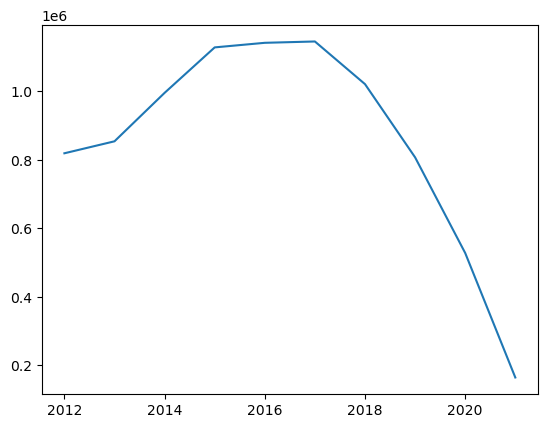

In [37]:
plt.plot(total_citations_by_year.keys(), total_citations_by_year.values())